# Pandas

![](https://miro.medium.com/max/700/0*kVETqwtYsQ8BFJDc.gif)

## Convenção Pandas

Por regra de convenção, utilizaremos a importação como ```import pandas as pd``` para que no futuro outros devs possam entender seu código... até você mesmo.

In [23]:
import pandas as pd
import numpy as np

## Series e DataFrames

Existem duas estruturas de dados principais no Pandas, o Series e o DataFrame
- *Series* é um array de 1 dimensão, assim como um simples de array de qualquer linguagem de programação
- *DataFrame* é um conjunto de séries, uma estrutura de dados de 2 dimensões, assim como uma tabela de um banco de dados. 

In [2]:
notas = pd.Series([2,7,5,10,6])

Já podemos verificar os atributos da nossa Series, começaremos pelos valores e o índice. os dois atributos fundamentais nesta estrutura:

In [3]:
notas

0     2
1     7
2     5
3    10
4     6
dtype: int64

In [4]:
notas.values

array([ 2,  7,  5, 10,  6])

In [5]:
notas.index

RangeIndex(start=0, stop=5, step=1)

Como ao criar a Series não demos um índice específico, o Pandas usou os inteiros positivos crescentes como padrão. Pode ser conveniente atribuirmos um índice diferente do padrão, supondo que essas sejam notas de uma turma, poderíamos atribuir nomes ao index?

In [6]:
notas = pd.Series([2,7,5,10,6], index=['Luke', 'Obi-Wan', 'Leia', 'Anakin', 'Chewbacca'])

In [7]:
notas

Luke          2
Obi-Wan       7
Leia          5
Anakin       10
Chewbacca     6
dtype: int64

O index nos ajuda para referenciar um determinado valor, ele nos permite acessar os valores pelo seu rótulo:

In [8]:
notas['Leia']

5

Outra facilidade proporcionada pela estrutura são seus métodos que fornecem informações estatísticas sobre os valores, como *média* ```.mean()``` e *desvio padrão* ```.std()```.

In [19]:
notas.mean()

6.0

In [20]:
notas.describe()

count     5.000000
mean      6.000000
std       2.915476
min       2.000000
25%       5.000000
50%       6.000000
75%       7.000000
max      10.000000
dtype: float64

In [21]:
notas**2

Luke           4
Obi-Wan       49
Leia          25
Anakin       100
Chewbacca     36
dtype: int64

In [24]:
np.log(notas)

Luke         0.693147
Obi-Wan      1.945910
Leia         1.609438
Anakin       2.302585
Chewbacca    1.791759
dtype: float64

### DataFrame

Já um DataFrame é uma estrutura bidimensional de dados, como uma planilha. Iremos criar um DataFrame que possui Valores de diferentes tipos, usando um dicionário como entrada de dados:

In [25]:
df = pd.DataFrame({
    'Aluno': ['Luke', 'Obi-Wan', 'Leia', 'Anakin', 'Chewbacca'],
    'Faltas': [5, 3, 2, 1, 1],
    'Prova': [3, 5, 4, 7, 6],
    'Trabalhos': [1, 1, 3, 3, 2]
})

In [27]:
df.dtypes

Aluno        object
Faltas        int64
Prova         int64
Trabalhos     int64
dtype: object

In [29]:
df.columns

Index(['Aluno', 'Faltas', 'Prova', 'Trabalhos'], dtype='object')

In [31]:
df['Aluno']

0         Luke
1      Obi-Wan
2         Leia
3       Anakin
4    Chewbacca
Name: Aluno, dtype: object

In [32]:
df.describe()

,Faltas,Prova,Trabalhos
count,5.00000,5.000000,5.0
mean,2.40000,5.000000,2.0
std,1.67332,1.581139,1.0
min,1.00000,3.000000,1.0
25%,1.00000,4.000000,1.0
50%,2.00000,5.000000,2.0
75%,3.00000,6.000000,3.0
max,5.00000,7.000000,3.0


In [34]:
df.mean()

Faltas       2.4
Prova        5.0
Trabalhos    2.0
dtype: float64

In [35]:
df.sort_values(by="Aluno")

,Aluno,Faltas,Prova,Trabalhos
3,Anakin,1,7,3
4,Chewbacca,1,6,2
2,Leia,2,4,3
0,Luke,5,3,1
1,Obi-Wan,3,5,1


In [36]:
df

,Aluno,Faltas,Prova,Trabalhos
0,Luke,5,3,1
1,Obi-Wan,3,5,1
2,Leia,2,4,3
3,Anakin,1,7,3
4,Chewbacca,1,6,2


In [37]:
df = df.sort_values(by='Aluno')

In [38]:
df

,Aluno,Faltas,Prova,Trabalhos
3,Anakin,1,7,3
4,Chewbacca,1,6,2
2,Leia,2,4,3
0,Luke,5,3,1
1,Obi-Wan,3,5,1


In [42]:
df.loc[1]

Aluno        Obi-Wan
Faltas             3
Prova              5
Trabalhos          1
Name: 1, dtype: object

In [45]:
df["Prova"]+df["Trabalhos"]

3    10
4     8
2     7
0     4
1     6
dtype: int64

In [46]:
df["Nota Final"] = df["Prova"]+df["Trabalhos"]

In [47]:
df

,Aluno,Faltas,Prova,Trabalhos,Nota Final
3,Anakin,1,7,3,10
4,Chewbacca,1,6,2,8
2,Leia,2,4,3,7
0,Luke,5,3,1,4
1,Obi-Wan,3,5,1,6


In [50]:
df[df["Nota Final"]>=6]

,Aluno,Faltas,Prova,Trabalhos,Nota Final
3,Anakin,1,7,3,10
4,Chewbacca,1,6,2,8
2,Leia,2,4,3,7
1,Obi-Wan,3,5,1,6


# Leitura de Dados

Nós vimos como manipular dados que nós mesmo ciramos, porém, nós precisamos na maioria das vezes analisar dados que já estão prontos. O Pandas nos fornece uma série de funcionalidades de leitura de dados, pros mais diversos formatos estruturais de dados. Por exemplo:
1. ```pd.read_csv``` para ler arquivos *.csv*, formato comum de armazenar dados de tabelas. 
2. ```pd.read_xlsx```, para ler arquivos Excel, é necessário instalar uma biblioteca adicional para esta funcionalidade.  
3. ```pd.read_html```, para ler tabelas diretamente de um website

In [79]:
df = pd.read_csv("Downloads/municipios_brasileiro.csv", sep=";")

In [80]:
df

,CITY,STATE,Pop_residente,IDHM_Rank,Renda,Educacao,CARRO,Regiao
0,Acrelândia,AC,12538,4079,"0,584","0,466",1223,Norte
1,Assis Brasil,AC,6072,4448,"0,578","0,456",290,Norte
2,Brasiléia,AC,21398,3832,"0,619","0,485",2122,Norte
3,Bujari,AC,8471,4426,"0,603","0,439",577,Norte
4,Capixaba,AC,8798,4755,"0,601","0,398",561,Norte
...,...,...,...,...,...,...,...,...
5554,Tocantinópolis,TO,22619,2415,"0,634","0,623",3500,Norte
5555,Tupirama,TO,1574,2690,"0,629","0,593",145,Norte
5556,Tupiratins,TO,2097,4484,"0,601","0,425",98,Norte
5557,Wanderlândia,TO,10981,3352,"0,619","0,561",589,Norte


Como esperado, nosso DataFrame possui muitas linhas, então, para facilitar a visualização dos dados podemos usar ```.head()``` para mostrar as primeiras linhas e ```.tail()``` para mostrar as ultimas...

In [140]:
df.head()

,CITY,STATE,Pop_residente,IDHM_Rank,Renda,Educacao,CARRO,Regiao
0,Acrelândia,AC,12538,4079,"0,584","0,466",1223,Norte
1,Assis Brasil,AC,6072,4448,"0,578","0,456",290,Norte
2,Brasiléia,AC,21398,3832,"0,619","0,485",2122,Norte
3,Bujari,AC,8471,4426,"0,603","0,439",577,Norte
4,Capixaba,AC,8798,4755,"0,601","0,398",561,Norte


In [141]:
df.tail()

,CITY,STATE,Pop_residente,IDHM_Rank,Renda,Educacao,CARRO,Regiao
5554,Tocantinópolis,TO,22619,2415,"0,634","0,623",3500,Norte
5555,Tupirama,TO,1574,2690,"0,629","0,593",145,Norte
5556,Tupiratins,TO,2097,4484,"0,601","0,425",98,Norte
5557,Wanderlândia,TO,10981,3352,"0,619","0,561",589,Norte
5558,Xambioá,TO,11484,2648,"0,648","0,57",848,Norte


Para contarmos valores, podemos usar o método ```.value_counts()```

In [101]:
df[df["Pop_residente"]>1000000]["Regiao"].value_counts()

Sudeste         0.333333
Nordeste        0.266667
Sul             0.133333
Centro-Oeste    0.133333
Norte           0.133333
Name: Regiao, dtype: float64

Podemos usar o ```.value_count()``` para mostrar em forma de porcentagem

In [102]:
df[df["Pop_residente"]>1000000]["Regiao"].value_counts(normalize=True)

Sudeste         0.333333
Nordeste        0.266667
Sul             0.133333
Centro-Oeste    0.133333
Norte           0.133333
Name: Regiao, dtype: float64

Podemos também ordenar nossa visualização por uma coluna por Asc e Desc

In [142]:
df.groupby("Regiao").agg(sum).sort_values(by="Pop_residente", ascending=False)

,Pop_residente,IDHM_Rank,CARRO
Regiao,,,
Sudeste,80492034,3166637,29984627
Nordeste,52997920,7733560,6873200
Sul,27390254,1823497,11694163
Norte,15860071,1742461,1734813
Centro-Oeste,14037367,994584,4591905


Podemos exibir nosso DataFrame em formato de gráfico

<AxesSubplot:ylabel='Regiao'>

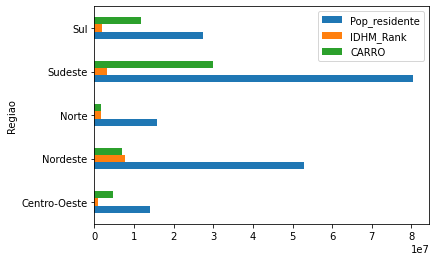

In [135]:
df.groupby("Regiao").agg(sum).plot.barh()

<AxesSubplot:ylabel='Pop_residente'>

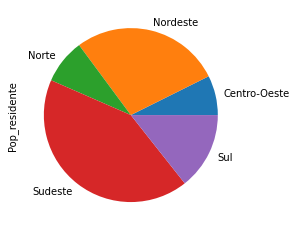

In [136]:
df.groupby("Regiao").agg(sum)["Pop_residente"].plot.pie()

E após transformarmos um DataFrame, podemos salvar em um arquivo csv

In [143]:
df.groupby("Regiao").agg(sum).to_csv("Downloads/municipios_brasileiro_filtrado.csv")

In [138]:
df_2 = pd.read_csv("Downloads/municipios_brasileiro_filtrado.csv")

In [139]:
df_2

,Regiao,Pop_residente,IDHM_Rank,CARRO
0,Centro-Oeste,14037367,994584,4591905
1,Nordeste,52997920,7733560,6873200
2,Norte,15860071,1742461,1734813
3,Sudeste,80492034,3166637,29984627
4,Sul,27390254,1823497,11694163
